## Brooke Johnson
#### Assignment: Lab 1

MSDS 598 Spring 2022

1/30/2022

In [83]:
import seaborn as sns
df = sns.load_dataset('penguins')

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. What are the variables in this dataset? Which are categorical? Which are continuous?
Discrete? (Use pandas commands to answer these questions!)

In [85]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [86]:
    df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


There are 7 variables in the dataset, each represented by its own column. bill_length_mm, bill_depth_mm, flipper_length_mm & body_mass_g are all continous numerical variables, represented by the data type float indicating that they are not discrete integers. Sex is a boolean variable, offering the values of either male or female. And species and island are categorical variables.

### 2. Which columns have missing values? How many?

In [87]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, and sex all have missing values. 2 missing values for all of the numerical columns, and 11 missing values for the sex column. 

### 3. Which species tpye, on average, weighs more? Does there seem to be a difference between male and female weight?

In [88]:
weight_avg_species = df[['species','body_mass_g']].groupby('species', as_index=False).mean()

In [89]:
weight_avg_species

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


The Gentoo penguin, on average, weighs the most, followed by the Chinstrap who leads Adelie by a slim margin. 

In [90]:
weight_avg_gender = df[['sex','body_mass_g']].groupby('sex', as_index=False).mean()

In [91]:
weight_avg_gender

,sex,body_mass_g
0,Female,3862.272727
1,Male,4545.684524


Yes, the males seem to weight, on average, more than the females.

### 4. How many species types are there? How many penguins are there for each species type?

In [92]:
df['species'].nunique()

3

In [93]:
df.groupby(by=['species'])['species'].count()

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: species, dtype: int64

There are 3 species, Adelie (152), Chinstrap (68) & Getoo (124). This data set has the most observations for the Adelie penguin, followed not far behind by the Gentoo. The Chinstrap, relatively, does not have many observations.  

### 5. Create a dataframe of only penguins of species "Adelie".

In [94]:
df[df['species'] == "Adelie"]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


### 6. Create a scatter plot where the x values are the first 100 integers in ascending order and y values are the first 100 integers in descending order

In [118]:
body_mass_asc = df.sort_values(by=['body_mass_g'], ascending=True)
body_mass_desc = df.sort_values(by=['body_mass_g'], ascending=False)

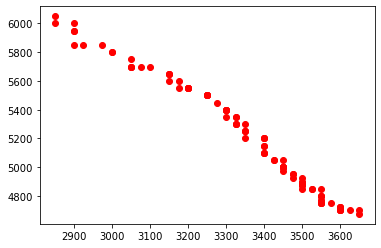

In [119]:
df_1 = body_mass_asc.iloc[1:100]
df_2 = body_mass_desc.iloc[1:100]
plt.plot(df_1['body_mass_g'], df_2['body_mass_g'], 'ro')
plt.show()

### 7. Create *one* figure with four histograms, one for each of the numeric variables in the penguins data.

<Figure size 432x288 with 0 Axes>

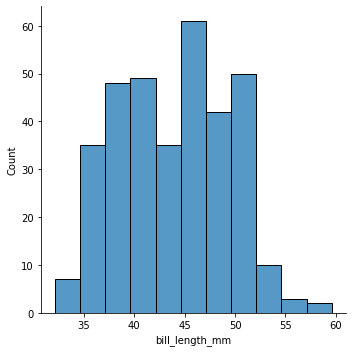

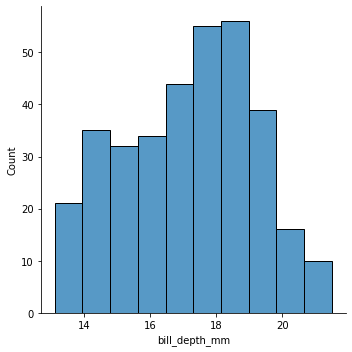

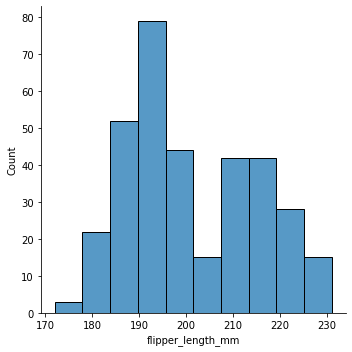

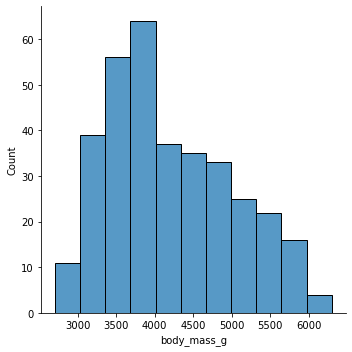

In [72]:
df1 = df.select_dtypes([int, float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.displot(df1[col])

# code adapted from this source: https://stackoverflow.com/questions/50773877/create-for-loop-to-plot-histograms-for-individual-columns-of-dataframe-with-seab/56779810

### 8. Make a scatter plot comparing two of numeric variables in the penguins data. Is there any relationship here?

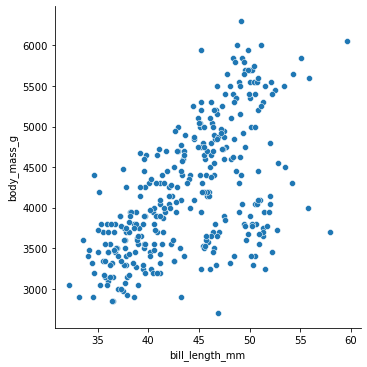

In [78]:
sns.relplot(kind="scatter", x="bill_length_mm", y="body_mass_g", data=df)

It looks like we might be able to identify a positive correlation between body mass and bill length. This follows general biogology logic that the larger a bird is the bigger its mouth will be. 